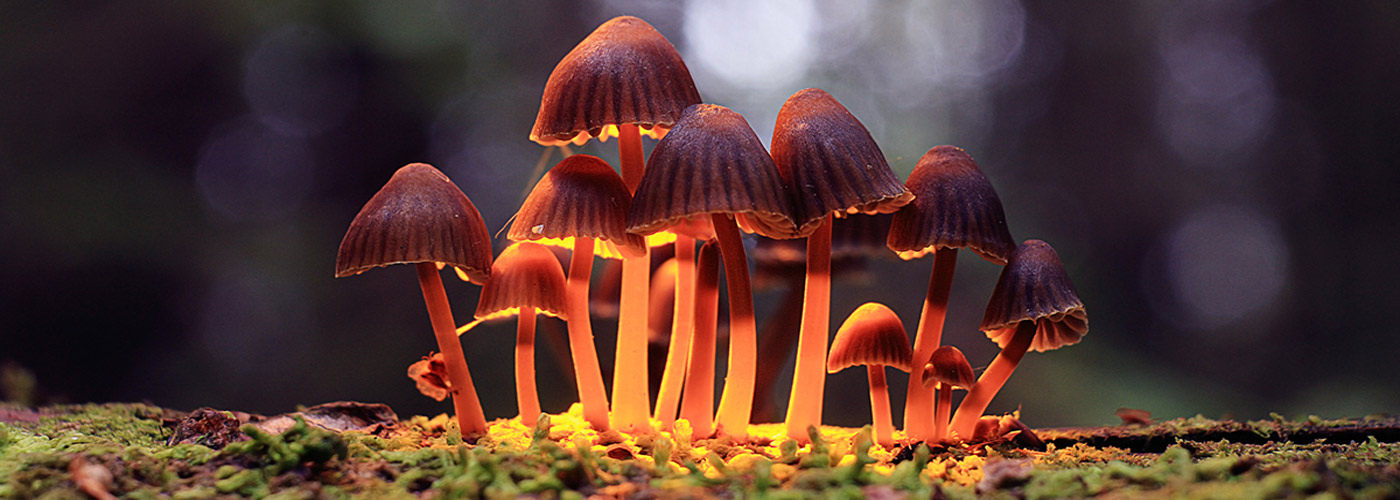

### Imports 

In [49]:
#Imports and load the data csv.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier

### Load The Data

In [50]:
df = pd.read_csv('D:\mushrooms.csv')

In [51]:
#Look at the Data Head
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
#Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Checking and Cleaning the data

In [53]:
#Checking if have some null values for Clean the data
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [54]:
#Checking how many rows and columns we have.
df.shape

(8124, 23)

### Explanation of the relevant features

Attribute Information: (classes: edible = e, poisonous = p)

* cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
* cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
* cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
* bruises: yes = t, no = f
* odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
* gill-attachment: attached = a, descending = d, free = f, notched = n
* gill-spacing: close = c, crowded = w, distant = d
* gill-size: broad = b, narrow = n
* gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
* stalk-shape: enlarging = e, tapering = t
* stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
* stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* veil-type: partial = p, universal = u
* veil-color: brown = n, orange = o, white = w, yellow = y
* ring-number: none = n, one = o, two = t
* ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
* spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
* population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
* habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

In [55]:
#how many Edible, Poisonous we have in the data set.
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

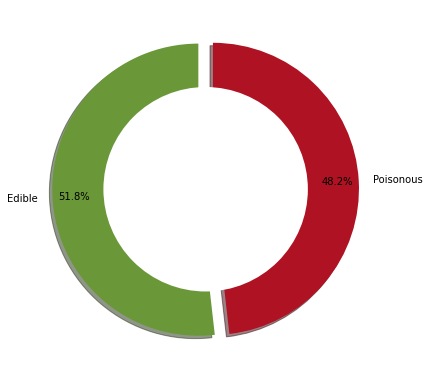

In [56]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize = (6,6))
#explsion
plt.pie(df['class'].value_counts(), colors = ['#6A9838','#af1222'], labels = ['Edible', 'Poisonous'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05), shadow = True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

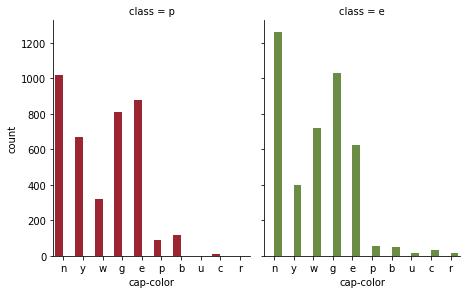

In [57]:
#The correlation between cap color and Edible or Poisonous
sns.catplot(x="cap-color", hue="class", col="class",data=df, kind="count",height=4, aspect=.8,palette =['#af1222','#6A9838']);

### Label Encoder -
changing the values to numbers with label encoders

dummy - impossible for dataset like this.

In [58]:
#preprocessing - changing the values to numbers with label encoder.
def Label_enc(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

In [59]:
for col in df.columns:
    df[str(col)] = Label_enc(df[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [60]:
#Look at the Data Head affter label encoder
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


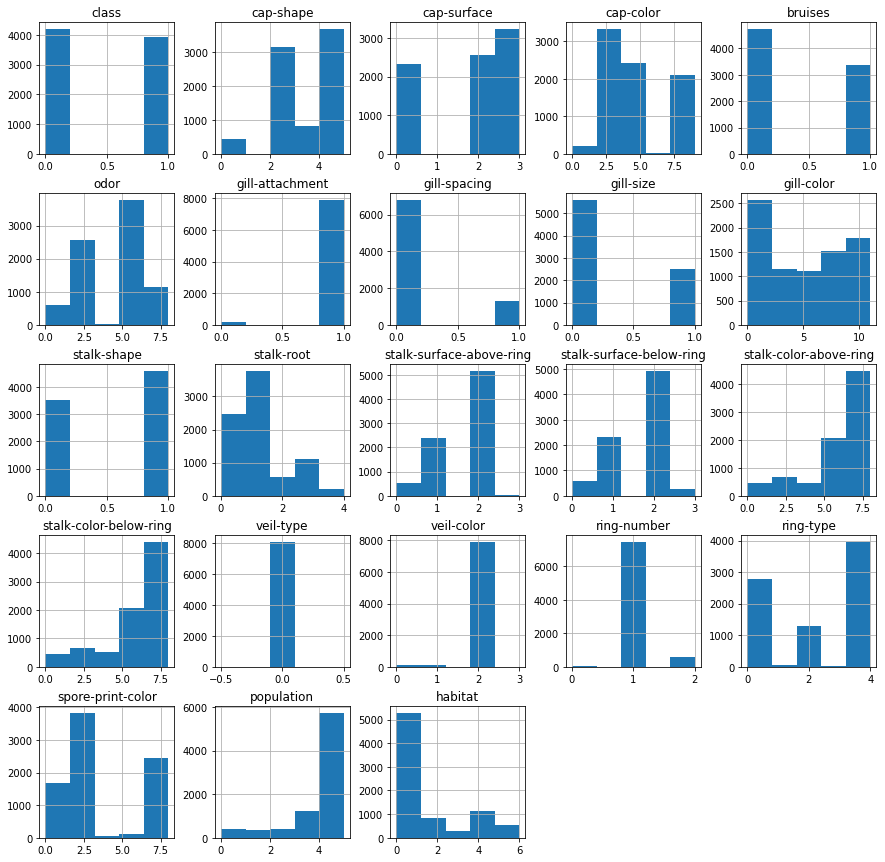

In [61]:
#Take a View of all features to gain insights
df.hist(bins=5, figsize=(15,15));

Easy to see that veil-type is useless because there are no data we need for.
So, i choose to delete veil-type from data.

In [62]:
#Easy to see that veil-type is useless because there are no data we needs.
del df['veil-type']

In [63]:
#Split the data to y and x with x is without the class's.
y = df['class']
X = df.drop('class', axis=1)

In [64]:
#Look at the Data Head affter deleting the veil-type and drop the class's.
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [65]:
#split data and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

#Data training set
print('Train data: ', len(X_train)/len(X))

#Data testing set
print('Test data: ', X_test.shape[0]/y.shape[0])

Train data:  0.75
Test data:  0.25


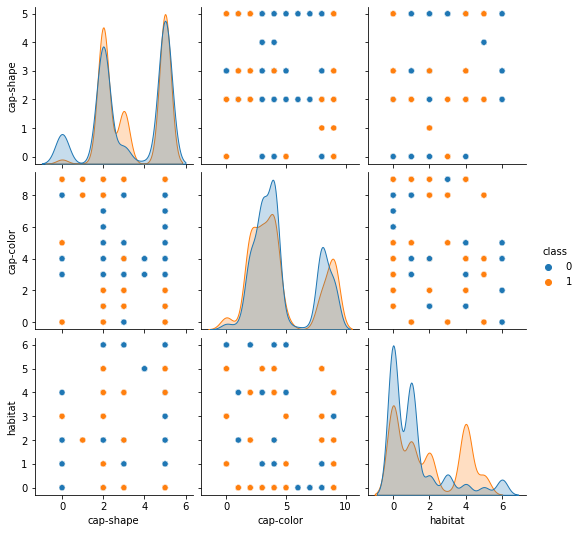

In [66]:
sns.pairplot(df,vars = ['cap-shape','cap-color','habitat' ], hue="class");

In [67]:
#Standardize features by removing the mean and scaling to unit variance
#StandardScaler Reducing each columns to gauss
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [68]:
#Look at the Data Head affter StandardScaler.
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


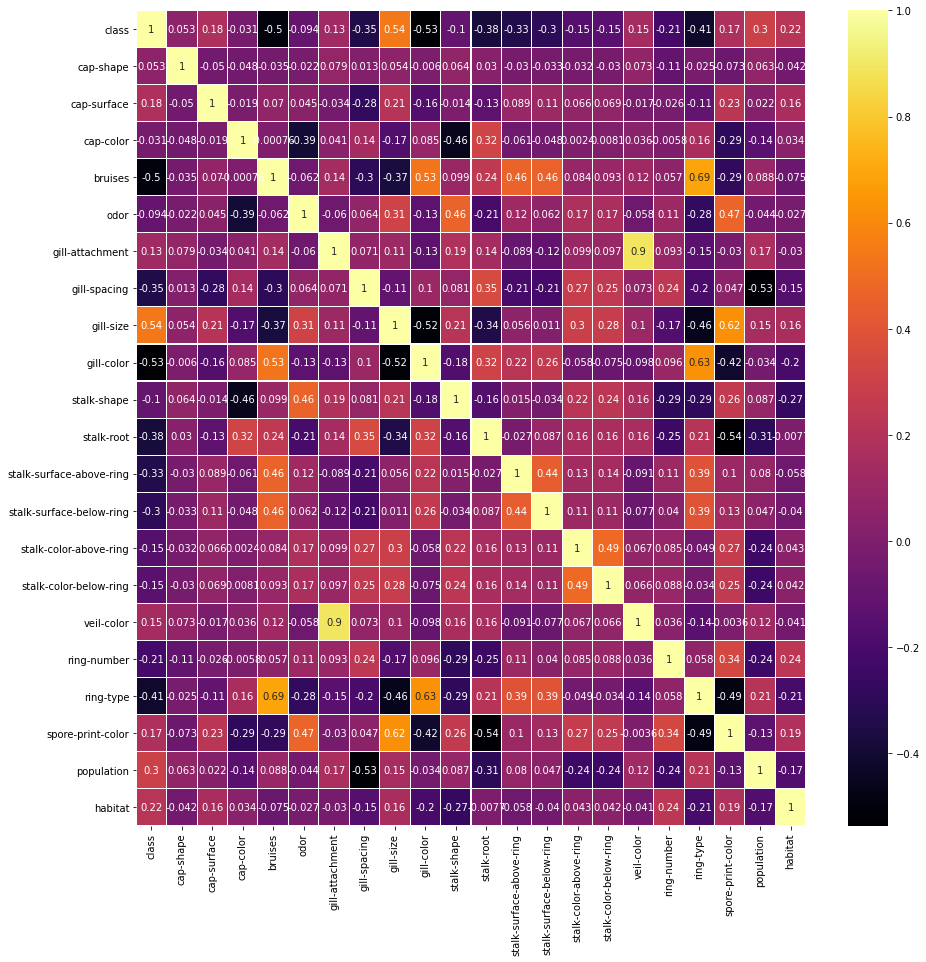

In [69]:
#Heatmap of all features.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1,cmap="inferno", annot=True);

In [70]:
#print how much rows and colums we have in test and train sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6093, 21) (2031, 21) (6093,) (2031,)


### DummyClassifier

In [75]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_predictions = dummy_clf.predict(X_test)

print("Accuracy score of dummy classifier: {}".format(accuracy_score(dummy_predictions,y_test)))

Accuracy score of dummy classifier: 0.5120630231413097


#### Knn Classifier 

In [21]:
#knn classifier with for loop [1-20] to check the best accuracy of n
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test,y_test)))

KNeighborsClassifier: n = 1 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 2 , Accuracy is: 0.9985228951255539
KNeighborsClassifier: n = 3 , Accuracy is: 0.9980305268340719
KNeighborsClassifier: n = 4 , Accuracy is: 0.9970457902511078
KNeighborsClassifier: n = 5 , Accuracy is: 0.9960610536681438
KNeighborsClassifier: n = 6 , Accuracy is: 0.9965534219596258
KNeighborsClassifier: n = 7 , Accuracy is: 0.9955686853766618
KNeighborsClassifier: n = 8 , Accuracy is: 0.9950763170851797
KNeighborsClassifier: n = 9 , Accuracy is: 0.9960610536681438
KNeighborsClassifier: n = 10 , Accuracy is: 0.9945839487936977
KNeighborsClassifier: n = 11 , Accuracy is: 0.9935992122107337
KNeighborsClassifier: n = 12 , Accuracy is: 0.9931068439192516
KNeighborsClassifier: n = 13 , Accuracy is: 0.9926144756277696
KNeighborsClassifier: n = 14 , Accuracy is: 0.9940915805022157
KNeighborsClassifier: n = 15 , Accuracy is: 0.9931068439192516
KNeighborsClassifier: n = 16 , Accuracy is: 0.9926144756277696
KN

#### Confusion matrix

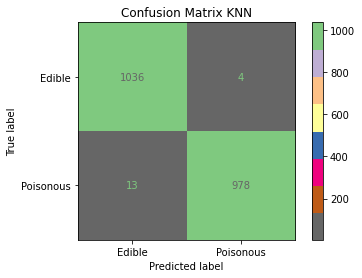

In [23]:
#plot_confusion_matrix of knn 
plot_confusion_matrix(knn, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix KNN')
plt.show()

In [24]:
#Print Confusion matrix Accuracy of knn
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_pred)))

Confusion matrix Accuracy is: 0.9916297390448056


### Roc Curve -
False Positive Rate / True Positive Rate 

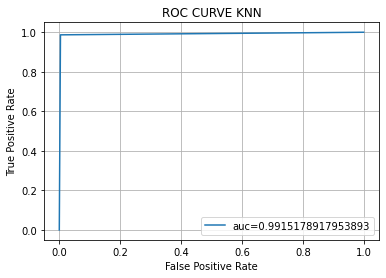

The Score for the ROC Curve is : 99.15%


In [34]:
#roc_curve plot to check the socre of knn
#how many negative we detect to be positive divided by true positive rate.
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

### Classification report

In [26]:
#classification_report of KNN
KNN_REPORT = classification_report(y_test, knn.predict(X_test))
print(KNN_REPORT)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1040
           1       1.00      0.99      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



We can see that there are no overfitting becuase the classification report precision are nearly the result between 0,1 !

### Cross Val Score for knn

In [78]:
#Cross Val Score of Knn (showing 20)
cvs = cross_val_score(knn, X, y, cv=20)
print(cvs)
cvs.mean()

[1.         1.         1.         1.         1.         0.99753695
 1.         1.         0.99014778 0.98029557 0.98029557 0.99753695
 1.         1.         1.         1.         1.         1.
 0.99014778 0.99261084]


0.9964285714285713

In [28]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_test,y_test)))

RandomForestClassifier Accuracy is: 1.0


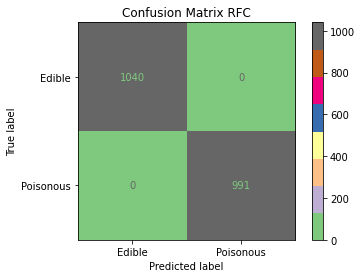

In [29]:
#plot_confusion_matrix of RFC 
plot_confusion_matrix(RFC, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = "Accent", normalize= None)
plt.title('Confusion Matrix RFC')
plt.show()

In [30]:
#Print Confusion matrix Accuracy of RFC
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_predict)))

Confusion matrix Accuracy is: 1.0


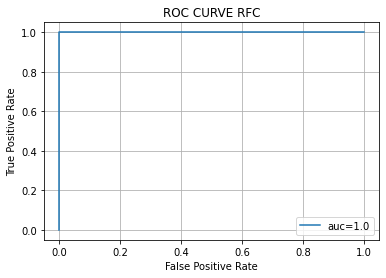

The Score for the ROC Curve is : 100.0%


In [31]:
#roc_curve plot to check the socre of RFC

fpr, tpr, _= roc_curve(y_test, y_predict)
auc_score = roc_auc_score(y_test, y_predict)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [32]:
#classification_report of RFC
RFC_REPORT = classification_report(y_test, y_predict)
print(RFC_REPORT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [77]:
#Cross Val Score of RFC (showing 20)
cvs = cross_val_score(RFC, X, y, cv=20)
print(cvs)
cvs.mean()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

## Results:

* We can see that RandomForestClassifier gives us the best result for this data set Accuracy of 1.0 !
* KNeighborsClassifier $n \in \mathbb{N}^+$, such that $11<n$ we can see decreasing of the Accuracy.

You can relex and enjoy of eating your mushrooms (after test with RandomForestClassifier of course)
